参考资料：<br>
白话word2vec：https://zhuanlan.zhihu.com/p/81032021 <br>
什么是词向量？https://blog.csdn.net/mawenqi0729/article/details/80698350 <br>
官方参数解读：https://tedboy.github.io/nlps/generated/generated/gensim.models.Word2Vec.html#gensim.models.Word2Vec <br>
为什么PCA：https://zhuanlan.zhihu.com/p/37810506 <br>
https://blog.csdn.net/HLBoy_happy/article/details/77146012 <br>
参数解读博客版：https://blog.csdn.net/xiaoQL520/article/details/102509477 <br>
负采样：https://zhuanlan.zhihu.com/p/144146838 <br>
更多资料：https://zhuanlan.zhihu.com/p/26306795 <br>
https://mp.weixin.qq.com/s/j8JPMZSPoVT_hQswX5QVxA

In [2]:
import jieba
import re
import numpy as np
from sklearn.decomposition import PCA
import gensim
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import matplotlib

## 分词

In [3]:
f = open("sanguo.txt", 'r',encoding='utf-8') #读入文本
lines = []
for line in f: #分别对每段分词
    temp = jieba.lcut(line)  #结巴分词 精确模式
    words = []
    for i in temp:
        #过滤掉所有的标点符号
        i = re.sub("[\s+\.\!\/_,$%^*(+\"\'””《》]+|[+——！，。？、~@#￥%……&*（）：；‘]+", "", i)
        if len(i) > 0:
            words.append(i)
    if len(words) > 0:
        lines.append(words)
print(lines[0:5])#预览前5行分词结果

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\20478\AppData\Local\Temp\jieba.cache
Loading model cost 0.345 seconds.
Prefix dict has been built successfully.


[['三国演义', '上卷'], ['罗贯中'], ['滚滚', '长江', '东', '逝水', '浪花', '淘尽', '英雄', '是非成败', '转头', '空', '青山', '依旧', '在', '几度', '夕阳红'], ['白发', '渔樵', '江渚上', '惯看', '秋月春风', '一壶', '浊酒', '喜相逢', '古今', '多少', '事', '都', '付笑谈', '中'], ['--', '调寄', '临江仙']]


## 模型训练 

In [15]:
# 调用Word2Vec训练
# 参数：size: 词向量维度；window: 上下文的宽度，min_count为考虑计算的单词的最低词频阈值
model = Word2Vec(lines,vector_size = 20, window = 2 , min_count = 3, epochs=7, negative=10,sg=1)
print("孔明的词向量：\n",model.wv.get_vector('孔明'))
print("\n和孔明相关性最高的前20个词语：")
model.wv.most_similar('孔明', topn = 20)# 与孔明最相关的前20个词语

孔明的词向量：
 [-1.5640393e-01 -2.9655609e-02  8.7462336e-02 -2.7275833e-01
  9.0480372e-02 -5.0305665e-01 -8.6407771e-04  1.1280043e+00
  4.7100815e-01  1.6584484e-01 -3.9065289e-01 -2.0766875e-01
  2.1183617e-01 -8.3016706e-01  1.1034235e+00  1.0825695e+00
  5.1953202e-01  1.3584066e-02 -1.0807070e+00 -4.3090224e-01]

和孔明相关性最高的前20个词语：


[('周瑜', 0.9151973724365234),
 ('玄德', 0.9105411171913147),
 ('关公', 0.8956979513168335),
 ('先主', 0.878402054309845),
 ('成都', 0.876902163028717),
 ('维', 0.8762589693069458),
 ('门吏', 0.875914454460144),
 ('懿', 0.8664056658744812),
 ('使人', 0.860798716545105),
 ('魏主', 0.8589323163032532),
 ('洛阳', 0.8588029742240906),
 ('孙权', 0.8582055568695068),
 ('孟获', 0.8551411628723145),
 ('孙夫人', 0.8512386679649353),
 ('陆逊', 0.8504637479782104),
 ('袁术', 0.8504469990730286),
 ('翼德', 0.8457504510879517),
 ('钟会', 0.8446943163871765),
 ('庞统', 0.8430181741714478),
 ('诸葛瑾', 0.8413565754890442)]

## 可视化 

In [22]:
# 将词向量投影到二维空间
rawWordVec = []
word2ind = {}
for i, w in enumerate(model.wv.index_to_key): #index_to_key 序号,词语
    rawWordVec.append(model.wv[w]) #词向量
    word2ind[w] = i #{词语:序号}
rawWordVec = np.array(rawWordVec)
X_reduced = PCA(n_components=2).fit_transform(rawWordVec)

[[-1.4564116   0.04926305]
 [-0.8728189   0.14392371]
 [-1.1549737   0.02184624]
 ...
 [ 0.00207684 -0.17475763]
 [ 0.08744951 -0.22554353]
 [ 0.21252231 -0.25327998]]


In [6]:
rawWordVec #降维之前20维

array([[ 0.11769973,  0.34309143, -0.37114987, ..., -0.44258583,
        -1.8216014 , -1.102503  ],
       [-0.24122016,  1.1447281 ,  0.18635601, ..., -0.37513238,
        -1.1016151 , -1.1631612 ],
       [ 0.21710268,  1.0924284 , -0.16638714, ..., -0.43233666,
        -1.2556725 , -0.5479264 ],
       ...,
       [-0.04238208,  0.21710937, -0.17706679, ..., -0.43574667,
        -0.47228658, -0.22311872],
       [-0.16340666,  0.19195445, -0.25374818, ..., -0.46934217,
        -0.42472377, -0.16482759],
       [-0.22498776,  0.24081092, -0.2999509 , ..., -0.38038832,
        -0.5125554 , -0.10963674]], dtype=float32)

In [7]:
X_reduced #降维之后2维

array([[-1.4210621 ,  0.08169179],
       [-0.9826405 ,  0.1533023 ],
       [-1.1058333 ,  0.07445934],
       ...,
       [-0.03461073, -0.14799547],
       [ 0.12772232, -0.25956216],
       [ 0.2111661 , -0.22091967]], dtype=float32)

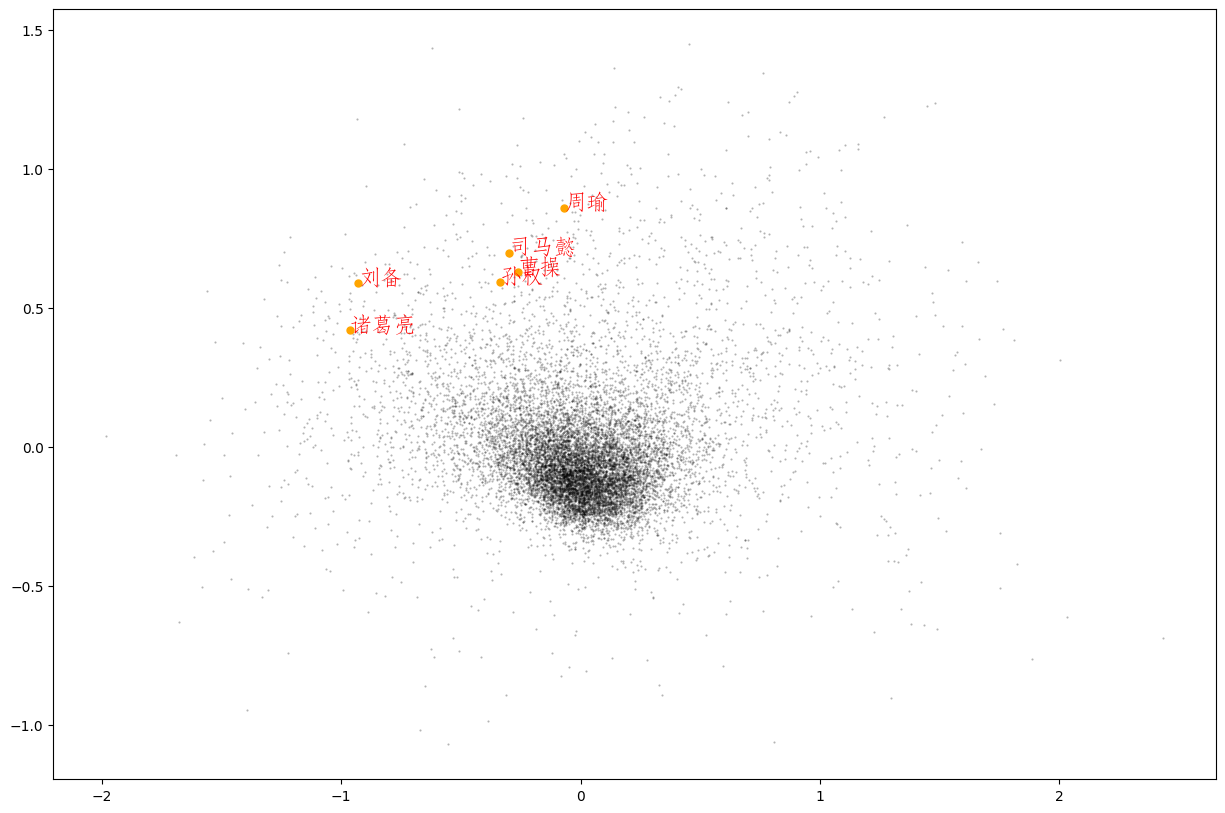

In [23]:
# 绘制星空图
# 绘制所有单词向量的二维空间投影
fig = plt.figure(figsize = (15, 10))
ax = fig.gca()
ax.set_facecolor('white')
ax.plot(X_reduced[:, 0], X_reduced[:, 1], '.', markersize = 1, alpha = 0.3, color = 'black')


# 绘制几个特殊单词的向量
words = ['孙权', '刘备', '曹操', '周瑜', '诸葛亮', '司马懿','汉献帝']

# 设置中文字体 否则乱码
zhfont1 = matplotlib.font_manager.FontProperties(fname='./华文仿宋.ttf', size=16)
for w in words:
    if w in word2ind:
        ind = word2ind[w]
        xy = X_reduced[ind]
        plt.plot(xy[0], xy[1], '.', alpha =1, color = 'orange',markersize=10)
        plt.text(xy[0], xy[1], w, fontproperties = zhfont1, alpha = 1, color = 'red')

## 类比关系实验

In [10]:
# 玄德－孔明＝？－曹操
words = model.wv.most_similar(positive=['玄德', '曹操'], negative=['孔明'])
words

[('司马懿', 0.9070726037025452),
 ('袁绍', 0.8475556969642639),
 ('马超', 0.8473115563392639),
 ('吕布', 0.8303004503250122),
 ('曹真', 0.8274961709976196),
 ('吴侯', 0.8177987933158875),
 ('蔡瑁', 0.8131771087646484),
 ('公孙瓒', 0.8079292178153992),
 ('袁术', 0.8043079972267151),
 ('周瑜', 0.8030818104743958)]

In [11]:
# 曹操－魏＝？－蜀
words = model.wv.most_similar(positive=['曹操', '蜀'], negative=['魏'])
words

[('袁绍', 0.6826168894767761),
 ('马超', 0.6702699065208435),
 ('刘备', 0.6255725622177124),
 ('吕布', 0.6056468486785889),
 ('东吴', 0.6047775745391846),
 ('孙策', 0.5895079374313354),
 ('吴兵', 0.5851077437400818),
 ('邓艾', 0.5839900374412537),
 ('孙坚', 0.583351194858551),
 ('五路', 0.5822818279266357)]